In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
from sklearn.datasets import make_classification
def dataset_loader():
    X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)
    x_new = pd.DataFrame(X, columns = ['feature1', 'feature2'])
    y_new = pd.Series(y)
    return x_new,y_new
x,y = dataset_loader()

x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [4]:
def gradient(x,y,pred):
    m = x.shape[0]
    dw = 1/m*(np.dot(x.T,(pred-y)))
    db = 1/m*(np.sum(pred-y))
    
    return dw, db

In [5]:
def loss(y, pred):
    loss = -np.mean(y*(np.log(pred)) - (1-y)*np.log(1-pred))
    return loss

In [6]:
def logistic_regression(x,y, max_iter, alpha):
    
    m = x.shape[0]
    n = x.shape[1]
    
    #Initialize weights
    weights = np.zeros(n)
    b = 0
    loss_ar = []
    
    #Gradient descent
    for i in range(max_iter):
        z = np.dot(x, weights.T) + b
        pred = sigmoid(z)
        dw, db = gradient(x,y,pred)   
        weights = weights - alpha*dw
        b = b - alpha*db
        loss_ar.append(loss(y, z))
        
    return weights,b,loss_ar
    
    

C:\Users\laxma\AppData\Local\Temp\ipykernel_13496\1389924015.py:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(pred)) - (1-y)*np.log(1-pred))
C:\Users\laxma\AppData\Local\Temp\ipykernel_13496\1389924015.py:2: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(y*(np.log(pred)) - (1-y)*np.log(1-pred))


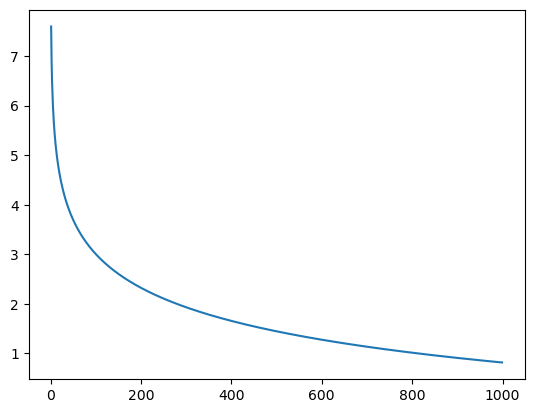

[-0.45632752 -0.03363358]


In [7]:
import matplotlib.pyplot as plt
a,b,c = logistic_regression(x_train,y_train,1000, 0.001)
plt.plot(c)
plt.show()
print(a)

In [8]:
def predict(x,weights,b):
    z = np.dot(x, weights.T) + b
    pred = sigmoid(z)
    preds = [1 if i > 0.5 else 0 for i in pred]
    
    return preds
    

ls = y_test-predict(x_test,a,b)
predict(x_test,a,b)
print(ls)

15    0
78    0
61    0
30    0
18    0
9     0
25    0
50    0
55    0
53    0
77    0
92    0
64    0
11    0
2     0
22    0
95    0
97    0
14    0
40    0
69    0
98    0
82    0
67    0
83    0
47    0
21    0
49    0
71    0
31    0
dtype: int32


In [9]:
## OR gate replication

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 1])
a,b,c = logistic_regression(X,Y,1000, 1)
print(a,b)

predict(X,a,b)


[8.66386029 8.66386029] -3.866779966647495


C:\Users\laxma\AppData\Local\Temp\ipykernel_13496\1389924015.py:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(pred)) - (1-y)*np.log(1-pred))
C:\Users\laxma\AppData\Local\Temp\ipykernel_13496\1389924015.py:2: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(pred)) - (1-y)*np.log(1-pred))
C:\Users\laxma\AppData\Local\Temp\ipykernel_13496\1389924015.py:2: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(y*(np.log(pred)) - (1-y)*np.log(1-pred))


[0, 1, 1, 1]

In [10]:
## AND gate replication

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])
a,b,c = logistic_regression(X,Y,1000, 1)
print(a,b)
predict(X,a,b)


[7.41431138 7.41431138] -11.294073552477853


C:\Users\laxma\AppData\Local\Temp\ipykernel_13496\1389924015.py:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(pred)) - (1-y)*np.log(1-pred))
C:\Users\laxma\AppData\Local\Temp\ipykernel_13496\1389924015.py:2: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(pred)) - (1-y)*np.log(1-pred))
C:\Users\laxma\AppData\Local\Temp\ipykernel_13496\1389924015.py:2: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(y*(np.log(pred)) - (1-y)*np.log(1-pred))


[0, 0, 0, 1]

In [11]:
## XOR gate replication

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])
a,b,c = logistic_regression(X,Y,1000, 1)
print(a,b)
predict(X,a,b)


[0. 0.] 0.0


C:\Users\laxma\AppData\Local\Temp\ipykernel_13496\1389924015.py:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(pred)) - (1-y)*np.log(1-pred))
C:\Users\laxma\AppData\Local\Temp\ipykernel_13496\1389924015.py:2: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(pred)) - (1-y)*np.log(1-pred))


[0, 0, 0, 0]

## Oservations on the weights obtained

we can observe that the weights of the model equation has changed for the three cases, OR, AND and XOR. It is also observed that both the weights are equal in all the three cases respectively. 

The predictions for both OR and AND gates have been shown to match with the true value because these data points are linearly separable. With a proper training, we were able to achieve at a proper weight and bias for both the cases.

In the case of XOR gate, since the data points are linearly inseparable the model was not able to differentiate between the classes. This has been implied by the 0 weights and a 0 bias. 

In [12]:
df = pd.read_csv(r'C:\Users\laxma\Downloads\iris.data')
df.columns = ['f1','f2','f3','f4','class'] 

df['class'] = df['class'].replace(['Iris-setosa'], int(0))
df['class'] = df['class'].replace(['Iris-versicolor'], int(1))
df['class'] = df['class'].replace(['Iris-virginica'], int(2))

x = df.drop(df.columns[4], axis = 1)
y = df[df.columns[4]]


In [13]:
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

In [14]:
def gradient_descent_iris(x, y, alpha, max_iter):
    
    n_samples, n_features = x.shape
    n_classes = len(np.unique(y))
    
    # Initialize weights matrix
    weights = np.random.randn(n_features, n_classes)
    
    #Intialize onehot matrix
    y_onehot = np.zeros((n_samples, n_classes))
                        
    for i in range(len(y)):
        if y[i] == 0:
            y_onehot[i] = [1,0,0]
        elif y[i] == 1:
            y_onehot[i] = [0,1,0]
        else:
            y_onehot[i] = [0,0,1]   
                        
    # Gradient descent
    for i in range(max_iter):
        
        z = np.dot(x, weights)
        probabilities = softmax(z)
        error = probabilities - y_onehot 
        gradients = np.dot(x.T, error)
        weights -= (1/n_samples)*alpha * gradients
    
    return weights

In [15]:
weights= gradient_descent_iris(x,y,0.01, 1000)

In [16]:
probabilities = softmax(np.dot(x, weights))

y_pred = np.argmax(probabilities, axis=1)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 2 1
 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2]


In [17]:
confusion_matrix = metrics.confusion_matrix(y, y_pred)

print(confusion_matrix)
print(accuracy_score(y, y_pred))

[[49  0  0]
 [ 0 41  9]
 [ 0  1 49]]
0.9328859060402684


## Observations for multiclass classification

We have used the softmax activation function to convert the feature vectors into probability distributions which can be further used to compute the weights of the model equation. 

We have also used the onehot operation to convert the classes  = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] into binary formats given by:

1. Iris-setosa = [1,0,0]

2. Iris-versicolor = [0,1,0]

3. Iris-virginica = [0,0,1]

By following the gradient descent approach, and finding the proper gradients we can calculate the weights of the model which predicts the classes properly.

The confusion matrix thus obtained shows the level of correct prediction made by the model. All 49 of the class Iris-setosa has been properly classified. 43 out of 50 of the class Iris-versicolor has been properly classified whereas the rest 7 has been falsely classified as the class Iris-virginica. The other 50 of class Iris-virginica has been coreclty classified.

The accuracy of the classification was found to be 0.9530201342281879..
